In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Load data sheet
df = pd.read_csv('../data/results/hotel_booking_cancellation_prediction_one_hot_deposit.csv')

In [33]:
# Convert the months in 'arrival_date' to numerical values
df['arrival_date_month'] = pd.to_datetime(df['arrival_date']).dt.month

# Define the X 
X = df.drop(columns=['is_canceled', 'arrival_date', 'stays_in_weeks_nights',
                      'children', 'babies'])



# Target variable
y = df['is_canceled']



In [34]:
# Split the date 80% train/ 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Keep the distribution of the target
)


# Calculate the imbalance ratio
cancel_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Imbalance: {cancel_ratio:.1f}:1")


Imbalance: 1.6:1


In [24]:
params = {
    'n_estimators': [100, 200],      # Număr de arbori
    'max_depth': [None, 10, 20],     # Adâncime maximă
    'min_samples_split': [2, 5],     # Număr minim de eșantioane pentru split
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}]  # Ajustare ponderi
}


grid = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'class_weight': {0: 1, 1: 2}, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [35]:
# Create the model

model = RandomForestClassifier(
    class_weight={0: 1, 1: 2},
    min_samples_split=5,
    n_jobs=-1,
    random_state=42,
    n_estimators=200
)

# Create the model
model.fit(X_train, y_train)

# Testing
y_pred = model.predict(X_test)

# Create the evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.854388635210553

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      1220
           1       0.84      0.76      0.80       751

    accuracy                           0.85      1971
   macro avg       0.85      0.84      0.84      1971
weighted avg       0.85      0.85      0.85      1971



                        Feature  Importance
0                     lead_time    0.111747
47           deposit_Non Refund    0.098784
13                          adr    0.078314
15    total_of_special_requests    0.075731
4     arrival_date_day_of_month    0.058153
3      arrival_date_week_number    0.056524
20                 room_changed    0.053729
46  cancellation_risk_lead_time    0.044659
6          stays_in_week_nights    0.039267
2            arrival_date_month    0.036791


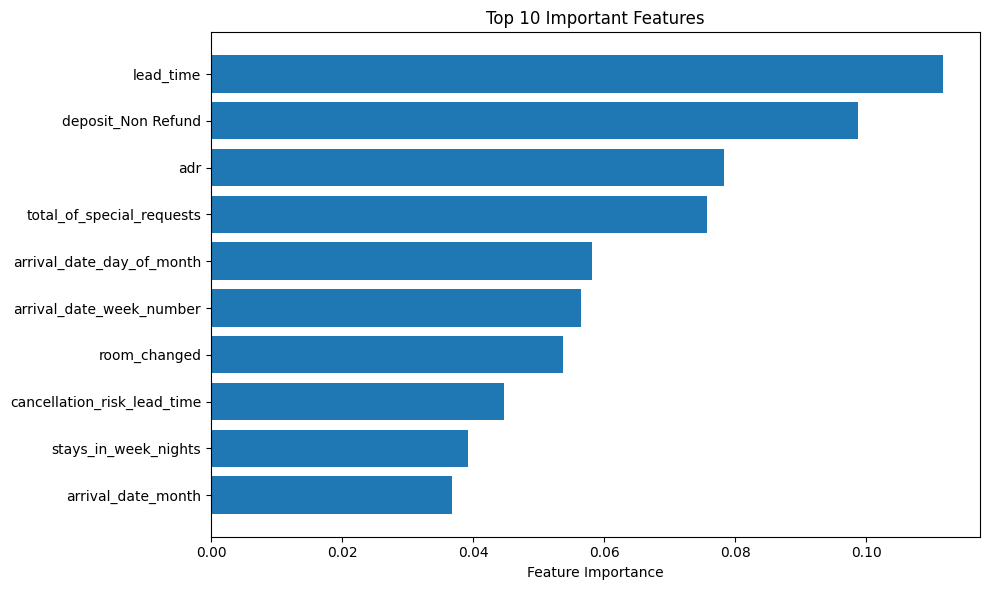

In [32]:
importances = model.feature_importances_
features = X.columns

# Creează un DataFrame pentru sortare
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Afișează top 10
print(feature_importance_df.head(10))

# Opțional: Grafic
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
